In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/objectDetection_Roads

/content/drive/MyDrive/Colab Notebooks/objectDetection_Roads


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/objectDetection_Roads
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Colab Notebooks/objectDetection_Roads
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

In [ ]:
!ls runs/detect/train2

args.yaml					    results.csv		train_batch2.jpg
confusion_matrix.png				    results.png		val_batch0_labels.jpg
events.out.tfevents.1697270294.50e40f5c4911.3532.0  train_batch0.jpg	val_batch0_pred.jpg
F1_curve.png					    train_batch135.jpg	val_batch1_labels.jpg
P_curve.png					    train_batch136.jpg	val_batch1_pred.jpg
PR_curve.png					    train_batch137.jpg	weights
R_curve.png					    train_batch1.jpg


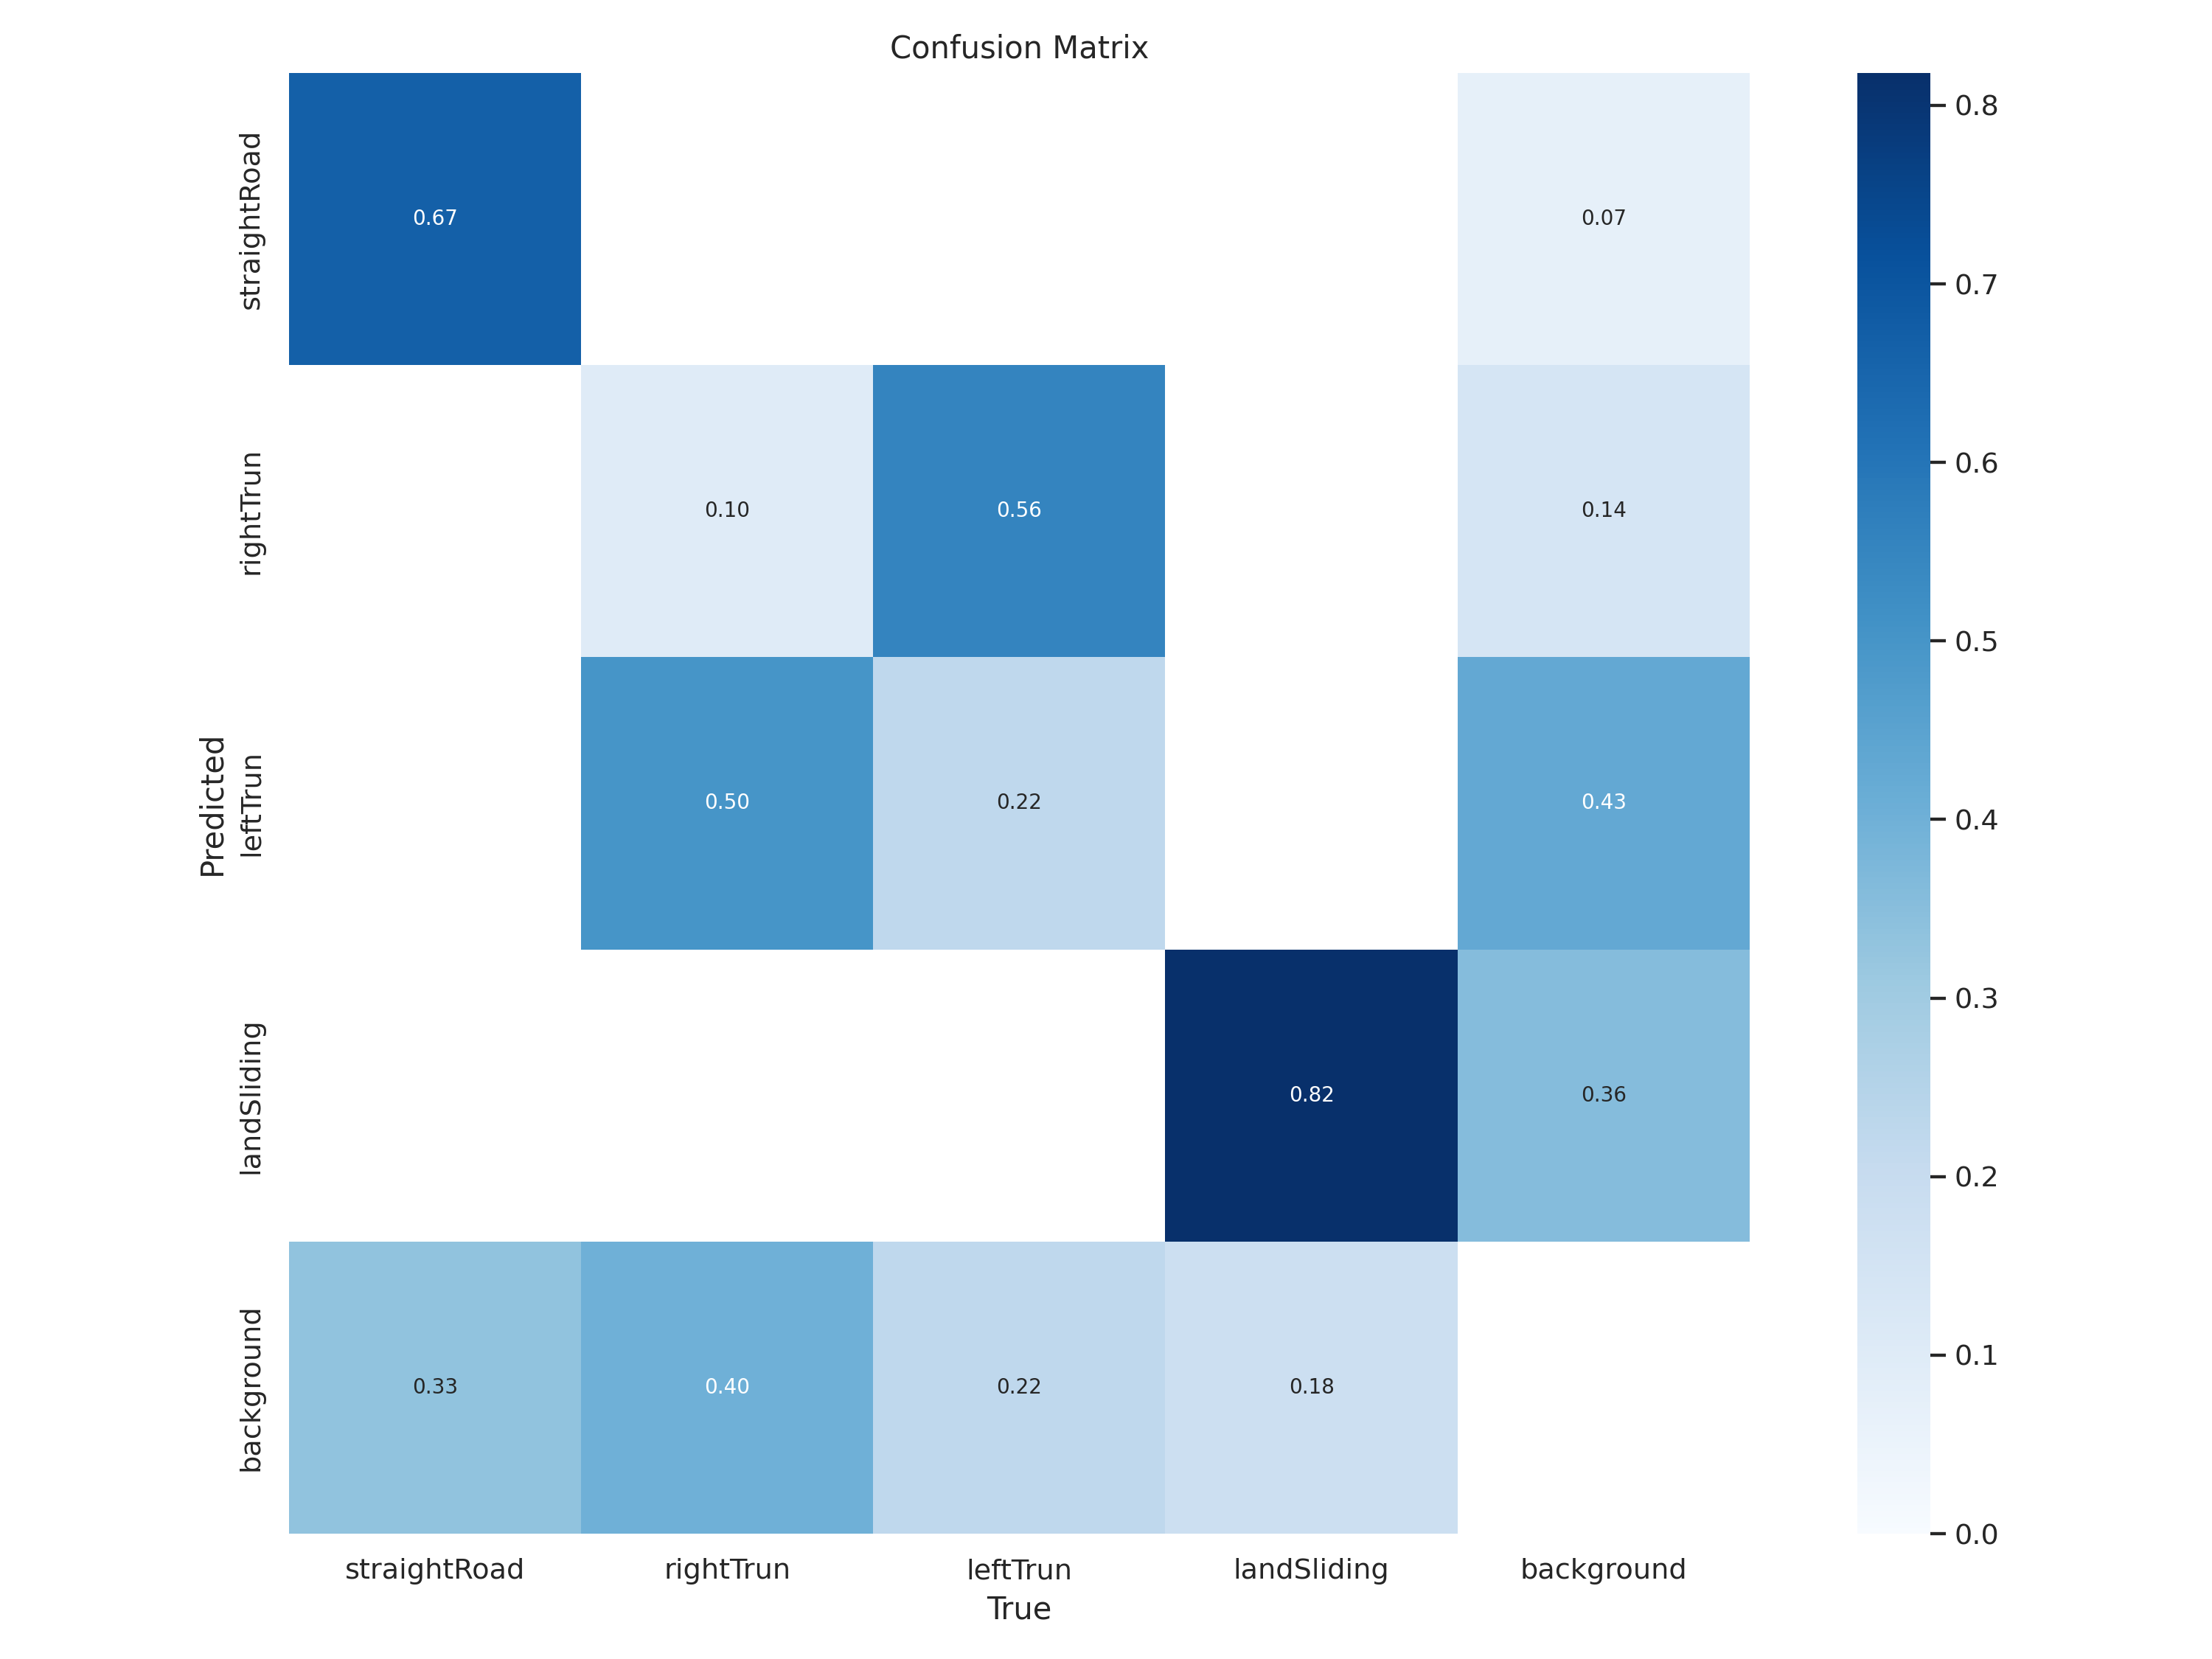

In [ ]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

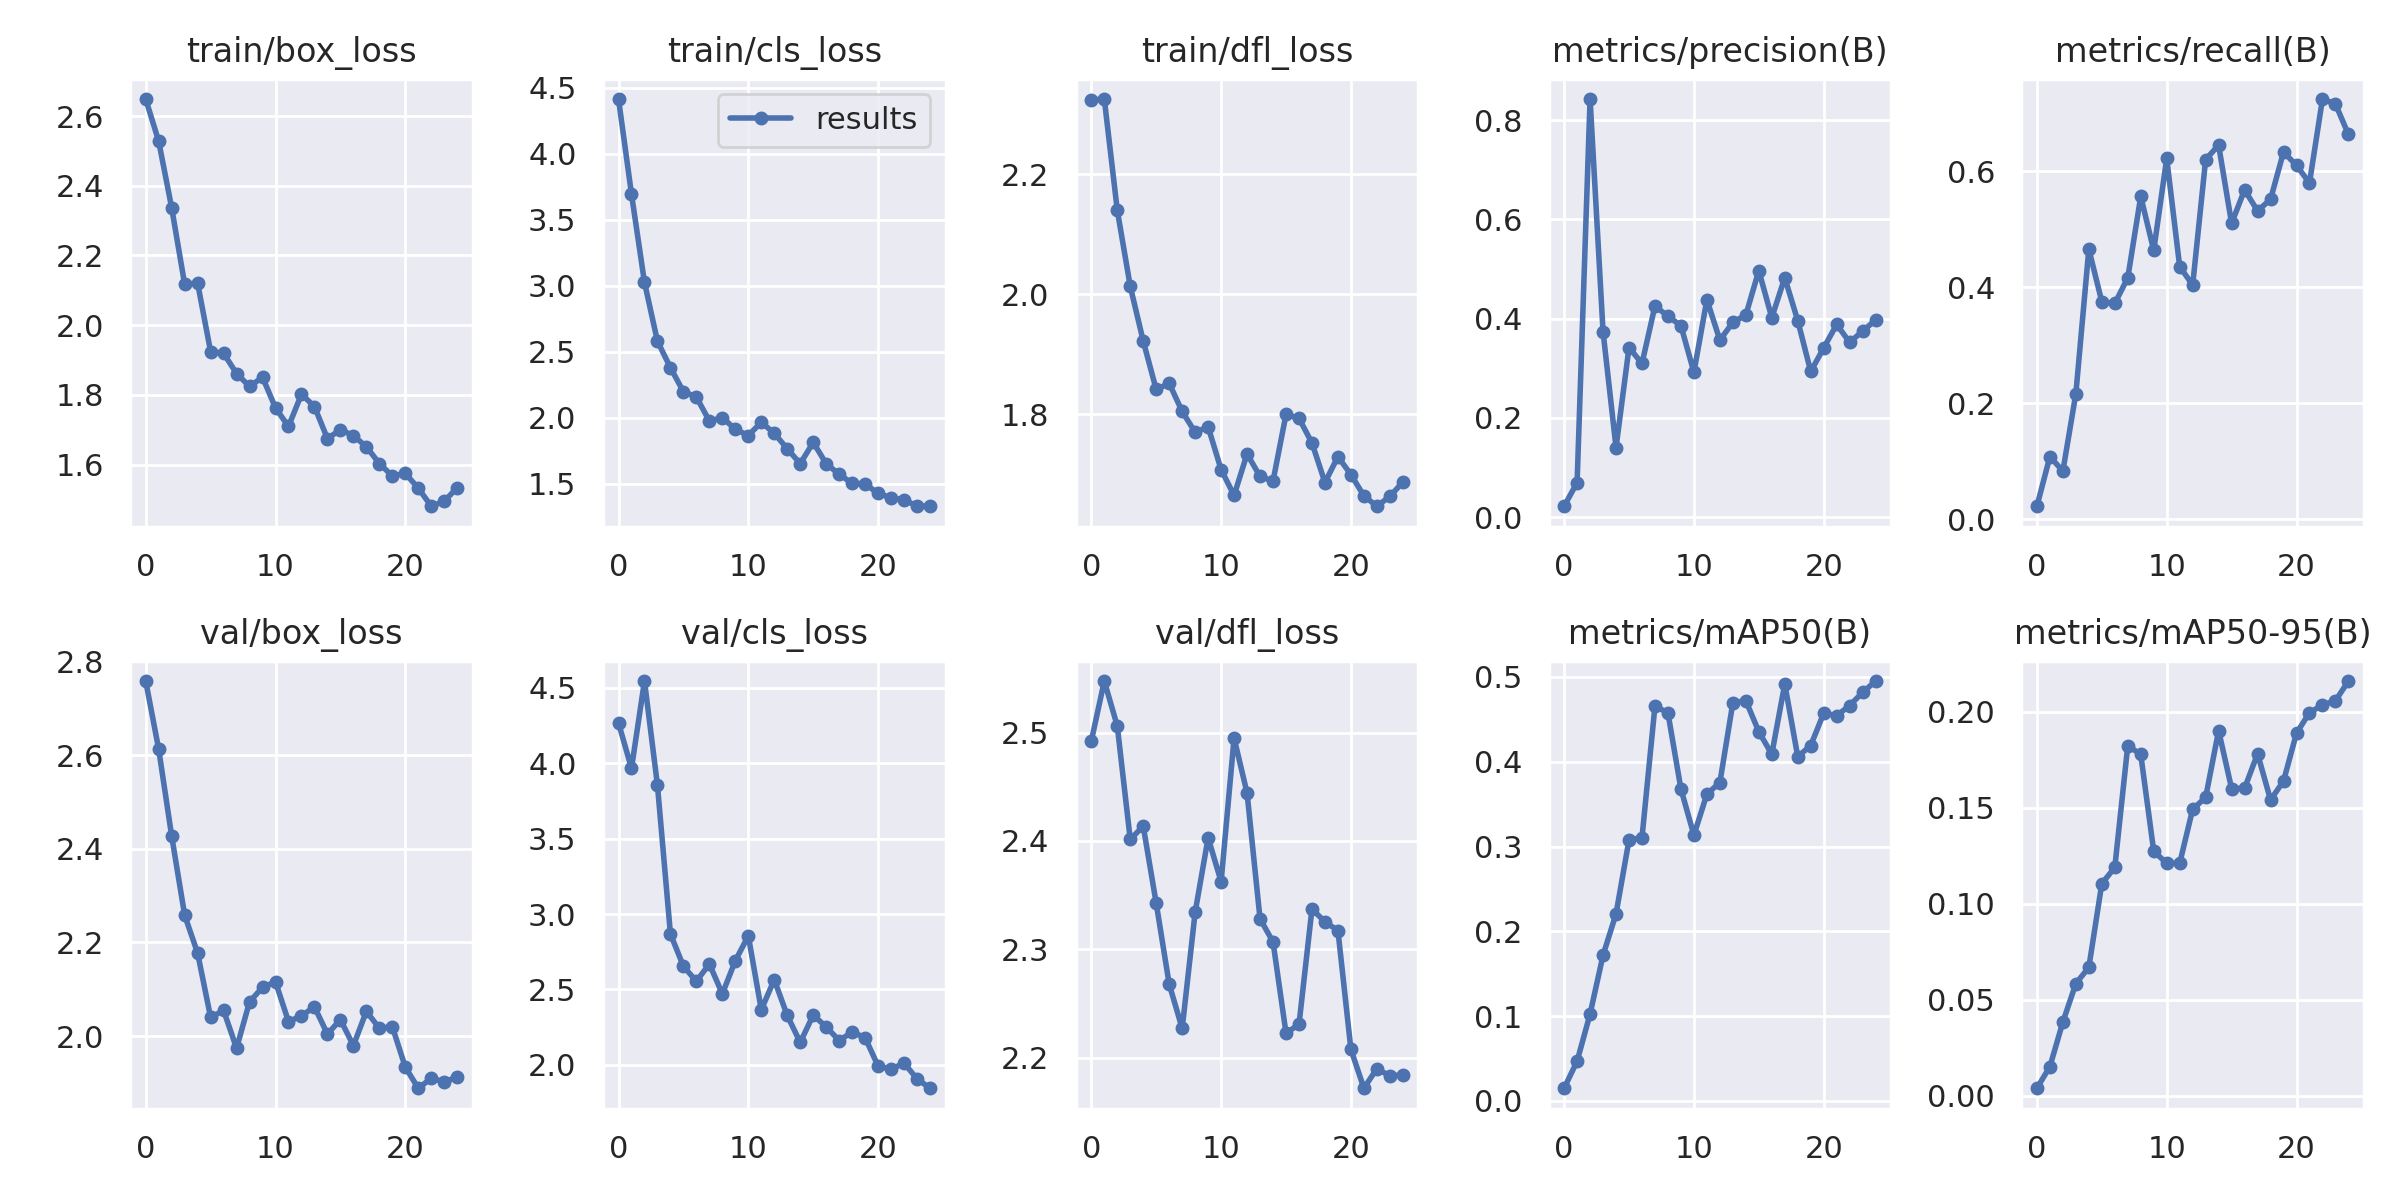

In [ ]:
Image(filename='runs/detect/train2/results.png', width=600)

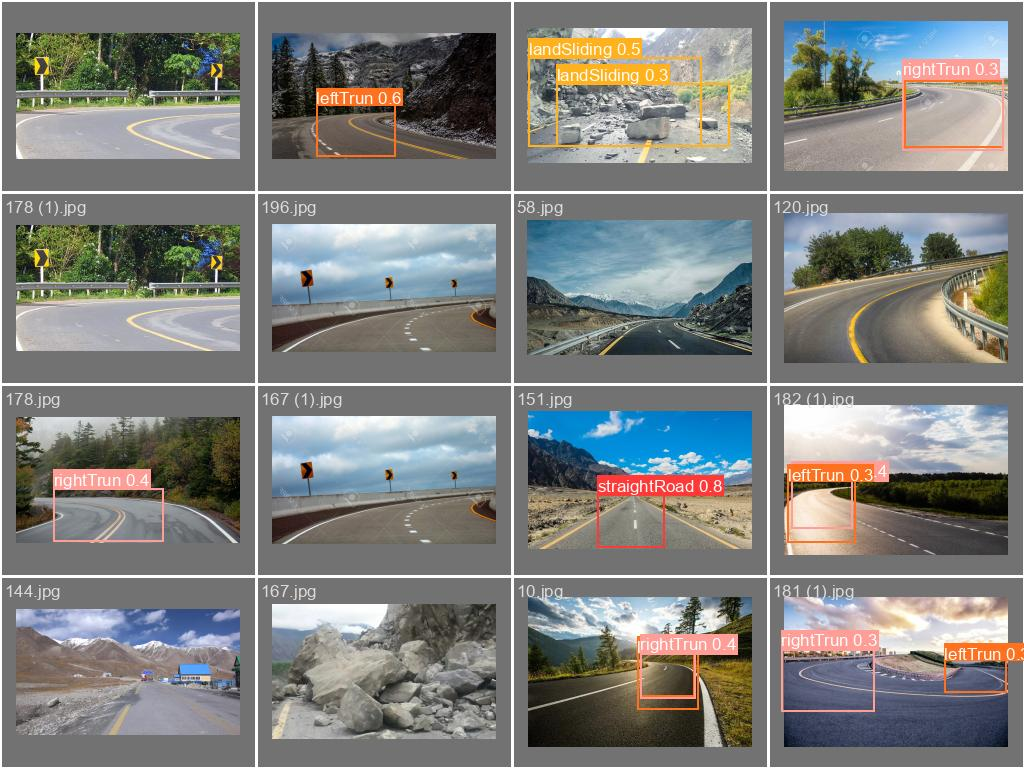

In [ ]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

2023-10-14 08:28:54.094766: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 08:28:55.440063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/objectDetection_Roads/Road_data/val/labels.cache... 39 images, 9 backgrounds, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:08<00:00,  2.69s/it]
                   all         48         39      0.394      0.714      0.497      0.217
          straightRoad         48    

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=Road_data/test/images/162.jpg

2023-10-14 08:29:38.923921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 08:29:40.099043: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/drive/MyDrive/Colab Notebooks/objectDetection_Roads/Road_data/test/images/162.jpg: 160x224 1 rightTrun, 80.0ms
Speed: 0.3ms pre-process, 80.0ms inference, 10.6ms postprocess per image at shape (1, 3, 224, 224)
